In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

datafile = np.loadtxt('20230203_PM8_z=-178.3mm.csv', delimiter=',')

In [24]:
x, y, z, theta, Bz = datafile.T[0], datafile.T[1], datafile.T[2], datafile.T[3], datafile.T[6]
xrange, yrange, zrange = np.abs(np.max(x) - np.min(x)), np.abs(np.max(y) - np.min(y)), np.abs(np.max(z) - np.min(z))
volume = xrange*yrange*zrange
volume, xrange, yrange, zrange

(0.0, 55.0, 146.0, 0.0)

In [25]:
#for i in range(0,len(theta)):
#    if theta[i] == 180:
#        if x[i] < 33.7:
#            x[i] = 67.4 - x[i]
#        elif x[i] > 33.7:
#            x[i] = x[i] - 2*(x[i]-33.7)

for i in range(0,len(theta)):
    if theta[i] == 180:
        x[i] = 67 - x[i]

In [26]:
df = pd.DataFrame()
df['x'], df['y'], df['z'], df['theta'], df['Bz'] = x, y, z, theta, Bz
df

,x,y,z,theta,Bz
0,0.0,-20.0,-178.3,0.0,0.000711
1,67.0,-20.0,-178.3,180.0,0.000739
2,0.5,-20.0,-178.3,0.0,0.000736
3,66.5,-20.0,-178.3,180.0,0.000722
4,1.0,-20.0,-178.3,0.0,0.000771
...,...,...,...,...,...
64923,42.5,-166.0,-178.3,180.0,0.002125
64924,25.0,-166.0,-178.3,0.0,0.002089
64925,42.0,-166.0,-178.3,180.0,0.002111
64926,25.5,-166.0,-178.3,0.0,0.001943


In [15]:
df0 = df[df.z<0.01]
df0 = df0[df0.z>-0.01]
df0

df1 = df[df.x<0.01]
df1 = df1[df1.x>-0.01]
df1 = df1[df1.y<0.01]
df1 = df1[df1.y>-0.01]
df1 = df1[df1.z<0.004]
df1 = df1[df1.z>-0.004]
df1

,x,y,z,B_z


Text(0.5, 0.92, 'South Face')

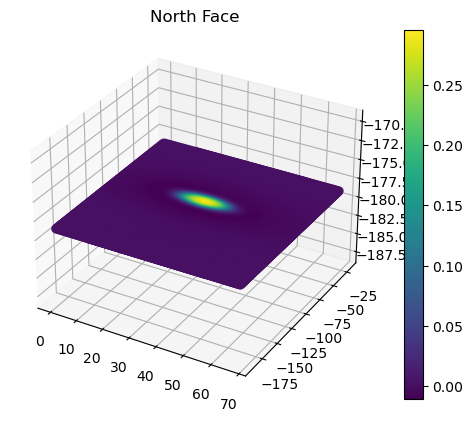

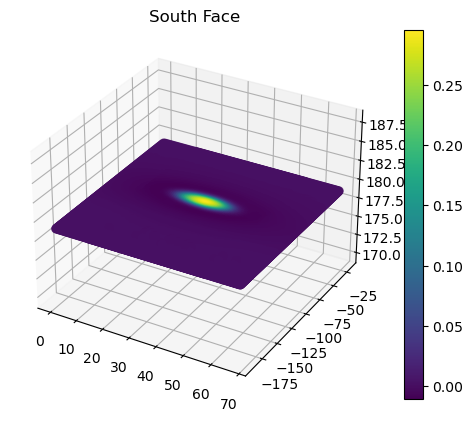

In [30]:
cm = plt.get_cmap("RdYlGn")
col = df.Bz

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(df0.x, df0.y, s=10, c=col, marker='o')
#ax.set_xlim(-0.02,0.02)
#ax.set_ylim(-0.02,0.02)
#plt.colorbar(jef)

col = df.Bz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
jef = ax.scatter(df.x, df.y, df.z, s=30, c=col, marker='o')
plt.colorbar(jef)
plt.title('North Face')

col = df.Bz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
jef = ax.scatter(df.x, df.y, -df.z, s=30, c=col, marker='o')
plt.colorbar(jef)
plt.title('South Face')

Text(0.5, 0.92, 'South Face')

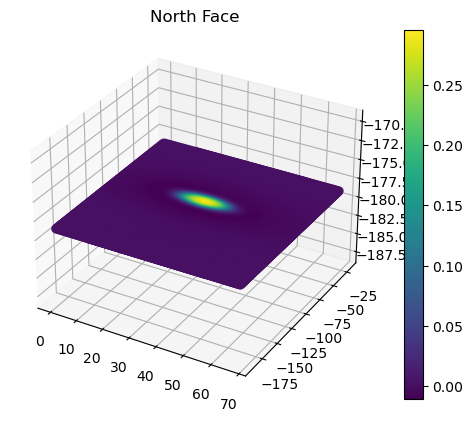

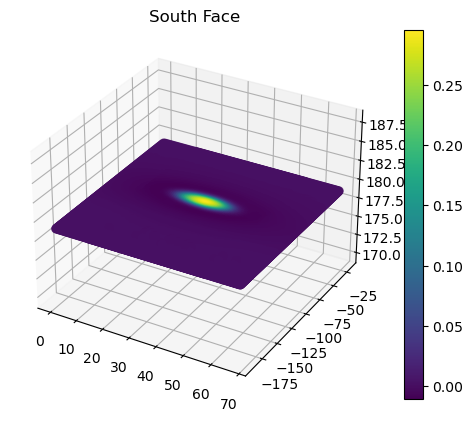

In [29]:
#datafile1 = np.loadtxt('20230125_PM8.csv', delimiter=',')

#x, y, z, B_z = datafile1.T[0], datafile1.T[1], datafile1.T[2], datafile1.T[6]

#magdf = pd.DataFrame()
#magdf['x'], magdf['y'], magdf['z'], magdf['B_z'] = x, y, z, B_z

cm = plt.get_cmap('magma')
col = df.Bz

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
jef = ax.scatter(df.x, df.y, df.z, s=30, c=col, marker='o')
plt.colorbar(jef)
plt.title('North Face')

col = df.Bz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
jef = ax.scatter(df.x, df.y, -df.z, s=30, c=col, marker='o')
plt.colorbar(jef)
plt.title('South Face')

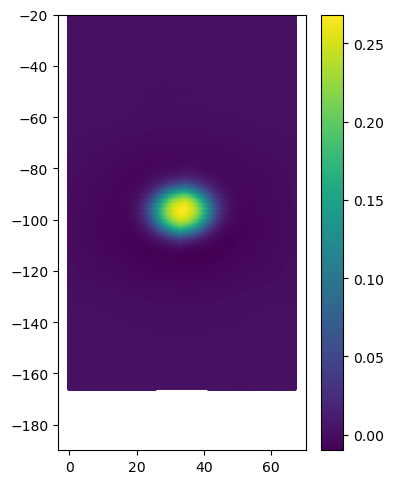

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#filename = np.loadtxt('20230120_PM8.csv', delimiter = ',')
#filename1 = np.loadtxt('20221214_PM8_2.csv', delimiter = ',')

#xydf = pd.DataFrame()
#xydf['x'], xydf['y'], xydf['B'] = filename.T[0], filename.T[1], filename.T[6]
col = df.Bz

#xydf1 = pd.DataFrame()
#xydf1['x'], xydf1['y'], xydf1['B'] = filename1.T[0], filename1.T[1], filename1.T[6]
#col1 = xydf1.B

fig = plt.figure(figsize=(4,5.659))
ax = fig.add_subplot(111)
color = ax.scatter(df.x, df.y, s=5, c=col, marker='o')
#color = ax.scatter(xydf1.x, xydf1.y, s=5, c=col1, marker='o')
#ax.plot(35.4,-96)
plt.colorbar(color)
ax.set_ylim(-190,-20)
plt.savefig('20230203_PM8_z=-178_3mm Plot', dpi=700)

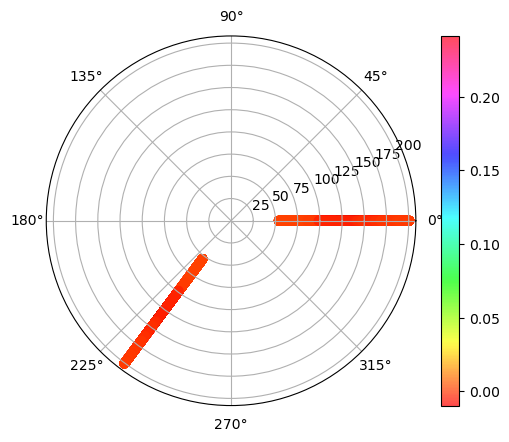

In [23]:
filename = np.loadtxt('20221219_PM8_z=-179.3mm.csv', delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
theta, r, B = filename.T[3], np.abs(filename.T[1] + 94.45), filename.T[6]
colors = Bz
c = ax.scatter(theta, r, c=colors, cmap='hsv', alpha=0.7)
plt.colorbar(c)